# Exploring the `NBAgame_details` dataset
This dataset was also found on [Kaggle](https://www.kaggle.com/nathanlauga/nba-games) from user Nathan Luaga who collected this data from the [NBA stats](https://www.nba.com/stats/) website. This dataset contains each players stats for each from 2003 to 2019 season.

# Notebook Objective
The main objective for this notebook is to clean the `games_details` dataset so it can be used later in the project to produce results such as player efficiency and team offensive efficiency. We will also add a `SEASON` column which will be used frequently in later analysis.

# Setup

## Imports

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## Parameters

In [2]:
# In
GAMES_DETAILS_DATASET = '../../data/raw/games_details.csv'

# Out
PROCESSED_DETAILS_DATASET = '../../data/processed/010_details.csv'

## Configuration

In [3]:
%matplotlib inline

# Loading the NBA Dataset

Let's read in the Games details dataset. This dataset contains the performance of each player in each game from the 2003 to 2019 season. It is a CSV file so we will use `.read_csv()`.

We will now use `.shape()` to and `.head()` to get a better idea of what our data looks like.

In [4]:
details = pd.read_csv(GAMES_DETAILS_DATASET, dtype={"MIN": "string"})
details.shape

(585794, 28)

In [5]:
details.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,12000047,1610612766,CHA,Charlotte,1628998,Cody Martin,F,NaN,17:06,0.0,...,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,-31.0
1,12000047,1610612766,CHA,Charlotte,1629023,P.J. Washington,F,NaN,24:58,4.0,...,1.0,6.0,7.0,2.0,2.0,1.0,5.0,3.0,9.0,-2.0
2,12000047,1610612766,CHA,Charlotte,203469,Cody Zeller,C,NaN,22:45,5.0,...,2.0,2.0,4.0,0.0,0.0,1.0,0.0,2.0,13.0,-23.0
3,12000047,1610612766,CHA,Charlotte,1628984,Devonte' Graham,G,NaN,31:30,8.0,...,1.0,3.0,4.0,3.0,2.0,0.0,4.0,0.0,25.0,-7.0
4,12000047,1610612766,CHA,Charlotte,1626179,Terry Rozier,G,NaN,26:48,8.0,...,1.0,4.0,5.0,6.0,1.0,0.0,0.0,2.0,24.0,22.0


We can use `.dtypes` to check our column headers and data types.

In [6]:
details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
START_POSITION        object
COMMENT               object
MIN                   string
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

# Checking for Missing Data

Some rows contain data of players that were injured, sick or picked for certain games.

In [7]:
details.isnull()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585789,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
585790,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
585791,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
585792,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True


We can use `.isnull()` in conjunction with `.sum()` to count the number of empty cells.

In [8]:
details.isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       361170
COMMENT              491738
MIN                   94057
FGM                   94057
FGA                   94057
FG_PCT                94057
FG3M                  94057
FG3A                  94057
FG3_PCT               94057
FTM                   94057
FTA                   94057
FT_PCT                94057
OREB                  94057
DREB                  94057
REB                   94057
AST                   94057
STL                   94057
BLK                   94057
TO                    94057
PF                    94057
PTS                   94057
PLUS_MINUS           117718
dtype: int64

To filter out players that didn't play we can remove rows that have nothing in the `MIN` column

In [9]:
details[details['MIN']>'0'].isnull().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
START_POSITION       267016
COMMENT              491640
MIN                       0
FGM                       0
FGA                       0
FG_PCT                    0
FG3M                      0
FG3A                      0
FG3_PCT                   0
FTM                       0
FTA                       0
FT_PCT                    0
OREB                      0
DREB                      0
REB                       0
AST                       0
STL                       0
BLK                       0
TO                        0
PF                        0
PTS                       0
PLUS_MINUS            23564
dtype: int64

In [10]:
played_details = details[details['MIN']>'0']
played_details.shape

(491640, 28)

Now we can group by `GAME_ID` and `TEAM_ID` to get advanced stats of each teams performance in each game.
<br>We also add the `id` columns to make it easier to calculate the season that the game occurred in.

In [11]:
advanced_game_data = played_details.groupby(['GAME_ID', 'TEAM_ID']).sum()
advanced_game_data['id'] = advanced_game_data.index
advanced_game_data.head(6)

PLAYER_ID   FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM  \
GAME_ID  TEAM_ID                                                                
10300001 1610612742      17609  34.0  76.0   4.177   2.0   8.0    1.000  15.0   
         1610612762      38429  32.0  70.0   9.758   1.0   7.0    1.000  25.0   
10300002 1610612749      23082  32.0  75.0   4.521   2.0  13.0    0.500  28.0   
         1610612763      32790  40.0  81.0   6.789   4.0  15.0    1.367  21.0   
10300003 1610612739      26307  38.0  77.0   5.051   4.0   6.0    1.500  20.0   
         1610612765      23201  34.0  87.0   5.448   4.0   9.0    2.667  24.0   

                      FTA  FT_PCT  ...  DREB   REB   AST   STL  BLK    TO  \
GAME_ID  TEAM_ID                   ...                                      
10300001 1610612742  30.0   3.191  ...  26.0  38.0  20.0   9.0  4.0  18.0   
         1610612762  34.0   8.183  ...  32.0  41.0  23.0   8.0  4.0  18.0   
10300002 1610612749  40.0   6.392  ...  32.0  43.0  20.0   9.0  4.0  24.0   
         1610612763  34.0   5.306  ...  34.0  48.0  25.0  18.0  7.0  25.0   
10300003 1610612739  29.0   7.000  ...  40.0  52.0  25.0  10.0  7.0  25.0   
         1610612765  40.0   4.851  ...  25.0  37.0  19.0  15.0  3.0  13.0   

                       PF    PTS  PLUS_MINUS                      id  
GAME_ID  TEAM_ID                                                      
10300001 1610612742  34.0   85.0         0.0  (10300001, 1610612742)  
         1610612762  26.0   90.0         0.0  (10300001, 1610612762)  
10300002 1610612749  26.0   94.0         0.0  (10300002, 1610612749)  
         1610612763  35.0  105.0         0.0  (10300002, 1610612763)  
10300003 1610612739  33.0  100.0         0.0  (10300003, 1610612739)  
         1610612765  27.0   96.0         0.0  (10300003, 1610612765)  

[6 rows x 21 columns]

We can make a function to calculate the season the game occurred in by taking part of `GAME_ID` and adding 20 to the start.

In [12]:
def season(game):
    return '20' + str(game['id'][0])[1:3]

In [13]:
advanced_game_data['SEASON'] = advanced_game_data.apply(lambda row: season(row), axis=1)
clean_advanced_game_data = advanced_game_data.drop(['id', 'PLAYER_ID'], axis=1)
clean_advanced_game_data.head(6)

FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  \
GAME_ID  TEAM_ID                                                           
10300001 1610612742  34.0  76.0   4.177   2.0   8.0    1.000  15.0  30.0   
         1610612762  32.0  70.0   9.758   1.0   7.0    1.000  25.0  34.0   
10300002 1610612749  32.0  75.0   4.521   2.0  13.0    0.500  28.0  40.0   
         1610612763  40.0  81.0   6.789   4.0  15.0    1.367  21.0  34.0   
10300003 1610612739  38.0  77.0   5.051   4.0   6.0    1.500  20.0  29.0   
         1610612765  34.0  87.0   5.448   4.0   9.0    2.667  24.0  40.0   

                     FT_PCT  OREB  DREB   REB   AST   STL  BLK    TO    PF  \
GAME_ID  TEAM_ID                                                             
10300001 1610612742   3.191  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   
         1610612762   8.183   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   
10300002 1610612749   6.392  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   
         1610612763   5.306  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0   
10300003 1610612739   7.000  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0   
         1610612765   4.851  12.0  25.0  37.0  19.0  15.0  3.0  13.0  27.0   

                       PTS  PLUS_MINUS SEASON  
GAME_ID  TEAM_ID                               
10300001 1610612742   85.0         0.0   2003  
         1610612762   90.0         0.0   2003  
10300002 1610612749   94.0         0.0   2003  
         1610612763  105.0         0.0   2003  
10300003 1610612739  100.0         0.0   2003  
         1610612765   96.0         0.0   2003

In [14]:
clean_advanced_game_data.columns

Index(['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
       'PLUS_MINUS', 'SEASON'],
      dtype='object')

Because we used the `sum()` operation our percentage columns are incorrect. This is easily fixed with a little calculation.

We'll start with field goal percentages

In [15]:
clean_advanced_game_data['FG_PCT'] = clean_advanced_game_data['FGM']/clean_advanced_game_data['FGA']
clean_advanced_game_data.head(5)

FGM   FGA    FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  \
GAME_ID  TEAM_ID                                                             
10300001 1610612742  34.0  76.0  0.447368   2.0   8.0    1.000  15.0  30.0   
         1610612762  32.0  70.0  0.457143   1.0   7.0    1.000  25.0  34.0   
10300002 1610612749  32.0  75.0  0.426667   2.0  13.0    0.500  28.0  40.0   
         1610612763  40.0  81.0  0.493827   4.0  15.0    1.367  21.0  34.0   
10300003 1610612739  38.0  77.0  0.493506   4.0   6.0    1.500  20.0  29.0   

                     FT_PCT  OREB  DREB   REB   AST   STL  BLK    TO    PF  \
GAME_ID  TEAM_ID                                                             
10300001 1610612742   3.191  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   
         1610612762   8.183   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   
10300002 1610612749   6.392  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   
         1610612763   5.306  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0   
10300003 1610612739   7.000  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0   

                       PTS  PLUS_MINUS SEASON  
GAME_ID  TEAM_ID                               
10300001 1610612742   85.0         0.0   2003  
         1610612762   90.0         0.0   2003  
10300002 1610612749   94.0         0.0   2003  
         1610612763  105.0         0.0   2003  
10300003 1610612739  100.0         0.0   2003

Now we'll do field goal percentage from the 3 point range

In [16]:
clean_advanced_game_data['FG3_PCT'] = clean_advanced_game_data['FG3M']/clean_advanced_game_data['FG3A']
clean_advanced_game_data.head(5)

FGM   FGA    FG_PCT  FG3M  FG3A   FG3_PCT   FTM   FTA  \
GAME_ID  TEAM_ID                                                              
10300001 1610612742  34.0  76.0  0.447368   2.0   8.0  0.250000  15.0  30.0   
         1610612762  32.0  70.0  0.457143   1.0   7.0  0.142857  25.0  34.0   
10300002 1610612749  32.0  75.0  0.426667   2.0  13.0  0.153846  28.0  40.0   
         1610612763  40.0  81.0  0.493827   4.0  15.0  0.266667  21.0  34.0   
10300003 1610612739  38.0  77.0  0.493506   4.0   6.0  0.666667  20.0  29.0   

                     FT_PCT  OREB  DREB   REB   AST   STL  BLK    TO    PF  \
GAME_ID  TEAM_ID                                                             
10300001 1610612742   3.191  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   
         1610612762   8.183   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   
10300002 1610612749   6.392  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   
         1610612763   5.306  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0   
10300003 1610612739   7.000  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0   

                       PTS  PLUS_MINUS SEASON  
GAME_ID  TEAM_ID                               
10300001 1610612742   85.0         0.0   2003  
         1610612762   90.0         0.0   2003  
10300002 1610612749   94.0         0.0   2003  
         1610612763  105.0         0.0   2003  
10300003 1610612739  100.0         0.0   2003

Lastly we can fix free throw percentage

In [17]:
clean_advanced_game_data['FT_PCT'] = clean_advanced_game_data['FTM']/clean_advanced_game_data['FTA']
clean_advanced_game_data.head(5)

FGM   FGA    FG_PCT  FG3M  FG3A   FG3_PCT   FTM   FTA  \
GAME_ID  TEAM_ID                                                              
10300001 1610612742  34.0  76.0  0.447368   2.0   8.0  0.250000  15.0  30.0   
         1610612762  32.0  70.0  0.457143   1.0   7.0  0.142857  25.0  34.0   
10300002 1610612749  32.0  75.0  0.426667   2.0  13.0  0.153846  28.0  40.0   
         1610612763  40.0  81.0  0.493827   4.0  15.0  0.266667  21.0  34.0   
10300003 1610612739  38.0  77.0  0.493506   4.0   6.0  0.666667  20.0  29.0   

                       FT_PCT  OREB  DREB   REB   AST   STL  BLK    TO    PF  \
GAME_ID  TEAM_ID                                                               
10300001 1610612742  0.500000  12.0  26.0  38.0  20.0   9.0  4.0  18.0  34.0   
         1610612762  0.735294   9.0  32.0  41.0  23.0   8.0  4.0  18.0  26.0   
10300002 1610612749  0.700000  11.0  32.0  43.0  20.0   9.0  4.0  24.0  26.0   
         1610612763  0.617647  14.0  34.0  48.0  25.0  18.0  7.0  25.0  35.0   
10300003 1610612739  0.689655  12.0  40.0  52.0  25.0  10.0  7.0  25.0  33.0   

                       PTS  PLUS_MINUS SEASON  
GAME_ID  TEAM_ID                               
10300001 1610612742   85.0         0.0   2003  
         1610612762   90.0         0.0   2003  
10300002 1610612749   94.0         0.0   2003  
         1610612763  105.0         0.0   2003  
10300003 1610612739  100.0         0.0   2003

At this point we can remove the index from our dataframe and the data will be structured how we want it.

In [18]:
all_games = clean_advanced_game_data.reset_index()
all_games

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,10300001,1610612742,34.0,76.0,0.447368,2.0,8.0,0.250000,15.0,30.0,...,26.0,38.0,20.0,9.0,4.0,18.0,34.0,85.0,0.0,2003
1,10300001,1610612762,32.0,70.0,0.457143,1.0,7.0,0.142857,25.0,34.0,...,32.0,41.0,23.0,8.0,4.0,18.0,26.0,90.0,0.0,2003
2,10300002,1610612749,32.0,75.0,0.426667,2.0,13.0,0.153846,28.0,40.0,...,32.0,43.0,20.0,9.0,4.0,24.0,26.0,94.0,0.0,2003
3,10300002,1610612763,40.0,81.0,0.493827,4.0,15.0,0.266667,21.0,34.0,...,34.0,48.0,25.0,18.0,7.0,25.0,35.0,105.0,0.0,2003
4,10300003,1610612739,38.0,77.0,0.493506,4.0,6.0,0.666667,20.0,29.0,...,40.0,52.0,25.0,10.0,7.0,25.0,33.0,100.0,0.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46838,41900405,1610612748,38.0,83.0,0.457831,14.0,33.0,0.424242,21.0,22.0,...,26.0,35.0,26.0,7.0,3.0,13.0,19.0,111.0,15.0,2019
46839,41900406,1610612747,43.0,89.0,0.483146,11.0,35.0,0.314286,9.0,14.0,...,34.0,46.0,23.0,5.0,4.0,12.0,22.0,106.0,65.0,2019
46840,41900406,1610612748,35.0,79.0,0.443038,10.0,28.0,0.357143,13.0,22.0,...,32.0,41.0,25.0,4.0,4.0,13.0,18.0,93.0,-65.0,2019
46841,51900111,1610612757,38.0,84.0,0.452381,15.0,40.0,0.375000,35.0,41.0,...,30.0,39.0,20.0,12.0,7.0,13.0,19.0,126.0,20.0,2019


Using this dataframe we can get seasonal data for a team. (1610612742 is the team id for the Dallas Mavericks)

In [19]:
all_games[all_games['TEAM_ID'] == 1610612742].groupby(['SEASON']).mean()

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
SEASON,,,,,,,,,,,,,,,,,,,,,
2003,2.119944e+07,1.610613e+09,40.303371,88.426966,0.457246,6.011236,17.494382,0.341141,17.966292,22.797753,...,14.640449,31.011236,45.651685,23.662921,8.089888,5.382022,11.966292,20.011236,104.584270,20.842697
2004,2.262276e+07,1.610613e+09,37.232323,81.767677,0.456603,5.727273,15.646465,0.362495,22.383838,28.373737,...,12.383838,30.555556,42.939394,19.191919,8.373737,5.464646,12.848485,22.494949,102.575758,22.737374
2005,2.386334e+07,1.610613e+09,35.858407,77.973451,0.460825,4.938053,13.592920,0.373524,22.115044,28.176991,...,12.398230,29.610619,42.008850,17.407080,7.362832,5.707965,13.044248,23.230088,98.769912,26.194690
2006,2.101721e+07,1.610613e+09,35.770833,78.229167,0.458585,6.343750,17.270833,0.367001,20.322917,25.468750,...,11.427083,30.812500,42.239583,19.437500,6.895833,5.031250,13.572917,22.666667,98.208333,28.510417
2007,2.091107e+07,1.610613e+09,36.431579,79.063158,0.461913,5.947368,16.884211,0.358369,21.000000,25.842105,...,10.778947,32.315789,43.094737,20.663158,5.957895,4.768421,12.273684,22.084211,99.810526,17.263158
2008,2.200053e+07,1.610613e+09,37.850000,81.740000,0.463775,6.950000,19.730000,0.354904,19.110000,23.700000,...,10.790000,31.800000,42.590000,21.300000,7.220000,5.150000,12.610000,20.280000,101.760000,7.650000
2009,2.142685e+07,1.610613e+09,37.821053,81.957895,0.462013,6.663158,18.263158,0.364214,19.094737,23.505263,...,10.284211,31.621053,41.905263,22.968421,7.705263,5.273684,12.547368,19.789474,101.400000,11.578947
2010,2.406358e+07,1.610613e+09,36.585586,78.117117,0.468645,7.810811,21.369369,0.362241,18.270270,23.513514,...,9.693694,31.450450,41.144144,23.009009,6.909910,4.234234,13.549550,19.783784,99.252252,21.081081
2011,2.193378e+07,1.610613e+09,35.930556,81.694444,0.440074,7.541667,22.097222,0.342703,16.013889,20.638889,...,10.111111,32.333333,42.444444,20.625000,8.597222,4.958333,13.611111,18.902778,95.416667,2.569444


Let's make a quick graph to check that our data is as we want it

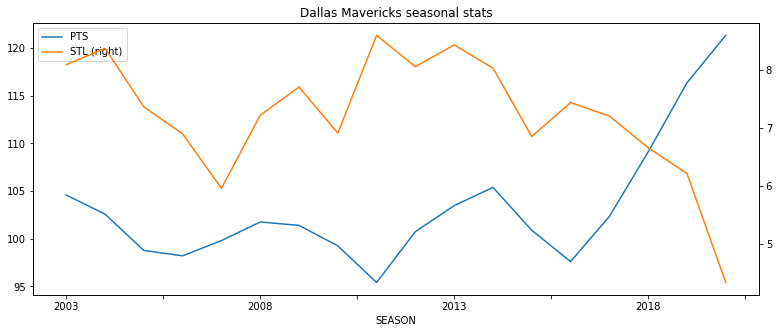

In [20]:
fig, ax = plt.subplots() # Create the figure and axes object
all_games[all_games['TEAM_ID'] == 1610612742].groupby(['SEASON']).mean()[['PTS','STL']]\
        .plot(y = 'PTS', ax = ax, kind = "line", figsize=(13,5), legend=True, title='Dallas Mavericks seasonal stats')
all_games[all_games['TEAM_ID'] == 1610612742].groupby(['SEASON']).mean()[['PTS','STL']]\
        .plot(y = 'STL', ax = ax, secondary_y = True, kind = "line", figsize=(13,5), legend=True, title='Dallas Mavericks seasonal stats')
plt.show()

We can also get each teams performance by season.

In [21]:
clean_advanced_game_data.groupby(['SEASON','TEAM_ID']).mean()

FGM        FGA    FG_PCT       FG3M       FG3A  \
SEASON TEAM_ID                                                            
2003   1610612737  34.421687  79.626506  0.432648   5.084337  15.132530   
       1610612738  34.413793  77.873563  0.442587   6.632184  19.264368   
       1610612739  35.619048  82.178571  0.435349   3.023810   9.571429   
       1610612740  33.511111  80.144444  0.419731   6.433333  20.066667   
       1610612741  33.963855  81.915663  0.416518   5.192771  15.168675   
...                      ...        ...       ...        ...        ...   
2020   1610612762  39.333333  82.666667  0.473724  17.666667  44.000000   
       1610612763  41.500000  92.000000  0.449940  15.000000  42.750000   
       1610612764  37.000000  88.000000  0.419131  12.000000  38.333333   
       1610612765  33.000000  80.500000  0.410506  12.250000  37.500000   
       1610612766  39.250000  88.250000  0.442886  14.500000  36.750000   

                    FG3_PCT        FTM        FTA    FT_PCT       OREB  \
SEASON TEAM_ID                                                           
2003   1610612737  0.321289  18.734940  24.144578  0.771723  12.108434   
       1610612738  0.340372  19.229885  25.620690  0.756621  10.333333   
       1610612739  0.320945  18.619048  24.845238  0.745874  13.547619   
       1610612740  0.324040  17.611111  23.422222  0.752134  13.200000   
       1610612741  0.350434  16.144578  22.265060  0.723154  12.626506   
...                     ...        ...        ...       ...        ...   
2020   1610612762  0.394622  22.000000  27.666667  0.775911   7.666667   
       1610612763  0.346042  20.500000  28.750000  0.714283   9.750000   
       1610612764  0.312846  13.666667  20.000000  0.678030   8.333333   
       1610612765  0.331339  15.750000  22.000000  0.696716   7.250000   
       1610612766  0.389052  19.250000  26.250000  0.779133   9.250000   

                        DREB        REB        AST        STL       BLK  \
SEASON TEAM_ID                                                            
2003   1610612737  30.638554  42.746988  20.072289   7.626506  4.939759   
       1610612738  29.793103  40.126437  20.390805   9.321839  4.080460   
       1610612739  32.059524  45.607143  22.071429   7.190476  6.571429   
       1610612740  29.500000  42.700000  20.866667   8.433333  4.244444   
       1610612741  30.650602  43.277108  21.722892   8.000000  4.879518   
...                      ...        ...        ...        ...       ...   
2020   1610612762  38.666667  46.333333  25.666667   6.666667  2.666667   
       1610612763  40.500000  50.250000  28.250000  10.750000  6.750000   
       1610612764  36.333333  44.666667  22.666667  12.000000  3.000000   
       1610612765  36.750000  44.000000  19.500000  11.750000  2.500000   
       1610612766  37.500000  46.750000  27.500000   7.250000  4.250000   

                          TO         PF         PTS  PLUS_MINUS  
SEASON TEAM_ID                                                   
2003   1610612737  15.566265  22.325301   92.662651  -22.951807  
       1610612738  15.988506  22.436782   94.689655  -10.689655  
       1610612739  14.369048  21.440476   92.880952  -12.797619  
       1610612740  14.244444  20.911111   91.066667   -1.777778  
       1610612741  15.228916  23.277108   89.265060  -31.445783  
...                      ...        ...         ...         ...  
2020   1610612762  14.666667  21.000000  118.333333   88.333333  
       1610612763  17.750000  24.750000  118.500000   52.500000  
       1610612764  18.666667  20.666667   99.666667  -21.666667  
       1610612765  21.250000  21.250000   94.000000   12.500000  
       1610612766  19.500000  22.000000  112.250000  -11.250000  

[539 rows x 19 columns]

In [22]:
score = clean_advanced_game_data[['SEASON', 'PTS']]
score

SEASON    PTS
GAME_ID  TEAM_ID                 
10300001 1610612742   2003   85.0
         1610612762   2003   90.0
10300002 1610612749   2003   94.0
         1610612763   2003  105.0
10300003 1610612739   2003  100.0
...                    ...    ...
41900405 1610612748   2019  111.0
41900406 1610612747   2019  106.0
         1610612748   2019   93.0
51900111 1610612757   2019  126.0
         1610612763   2019  122.0

[46843 rows x 2 columns]

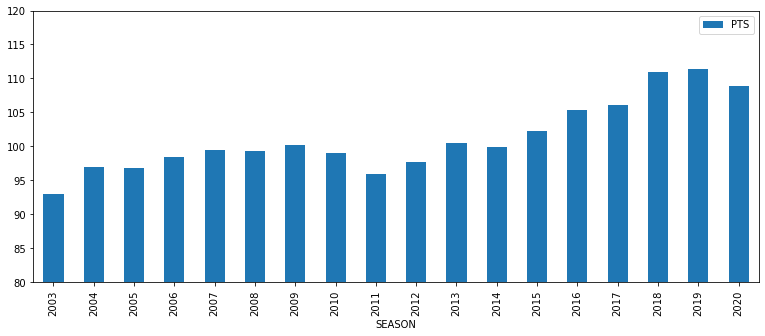

In [23]:
score.groupby(['SEASON']).mean().plot(kind = "bar", figsize=(13,5))
plt.ylim([80, 120])
plt.show()

# Save Game Details Dataset
Now that the dataset has been cleaned we can save it to our processed data folder.

In [24]:
clean_advanced_game_data.to_csv(PROCESSED_DETAILS_DATASET)
clean_advanced_game_data.columns, PROCESSED_DETAILS_DATASET

(Index(['FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
        'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS',
        'PLUS_MINUS', 'SEASON'],
       dtype='object'),
 '../../data/processed/010_details.csv')

# Clear dataframes
This project contains many dataframes. To make sure we don't run out of memory we will delete our dataframes at the end of each notebook.

In [25]:
%reset -f